In [2]:
from BorderQuery import select_mungedata, insert_predictions, select_features
from BorderModel import BorderData, handle_categoricals, model_years
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
import pandas as pd

# Peace Arch
## Sanity test model

In [3]:
df = select_mungedata(2, 1, '2008-1-1')

In [3]:
data = BorderData(df, categoricals=['event'])

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)

data.predict(grid)
data.predict_ensemble()
data.print_metrics(grid)

OOB:  0.9112814356
Best score:  0.383691991105
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  106.037146373
Ensemble :  91.9049776083
Weights  :  (0.87546482817935323, 1.131480714387938)
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0654513758574
Ensemble :  0.190003943769
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.282734183054
Ensemble :  0.344959275285


## Predict on full training data

In [4]:
model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X, data.y)

GridSearchCV(cv=array([[ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 7...20, 108021, 108022, 108023, 108024, 108025, 108026, 108027, 108028, 108029, 108030]]], dtype=object),
       error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=96, n_jobs=-1, oob_score=True, random_state=None,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [5]:
features = select_features('2015-12-1', '2018-1-1')

In [6]:
fmatrix = handle_categoricals(features, ['event'])

In [7]:
yhat = grid.best_estimator_.predict(fmatrix)

In [8]:
# insert_predictions('v1.0', 2, 1, fmatrix.index, yhat)

IntegrityError: duplicate key value violates unique constraint "predictions_pkey"
DETAIL:  Key (model_version, munger_id, crossing_id, date)=(v1.0, 2, 1, 2015-12-01 00:00:00) already exists.


## Compare predictions by year

In [5]:
from BorderModel import model_years
model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
models = model_years(df, model, 2011, 2015, categoricals=['event'])

Training...  2011
minimize unexplained ValueError.  Returning default weights
Baseline :  0.395701509877
Model    :  -0.181824651761
Ensemble :  0.389848422039
Training...  2012
Baseline :  0.609866621201
Model    :  0.581085007711
Ensemble :  0.638943000719
Training...  2013
Baseline :  0.61359183581
Model    :  0.659729866993
Ensemble :  0.673081552596
Training...  2014
Baseline :  0.569483794384
Model    :  0.617802588992
Ensemble :  0.63511779035
Training...  2015
Baseline :  0.14722281598
Model    :  0.0610630251563
Ensemble :  0.19052238452


# Pacific Crossing

In [24]:
df = select_mungedata(2, 5, '2008-1-1')

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

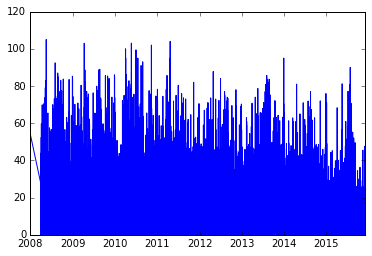

In [26]:
plt.plot(df.set_index('date').waittime);

In [11]:
df = select_mungedata(2, 5, '2008-1-1')
data = BorderData(df, categoricals=['event'])

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)

data.predict(grid)
data.predict_ensemble()
data.print_metrics(grid)

minimize unexplained ValueError.  Returning default weights
OOB:  0.912540648939
Best score:  0.579938793465
** MSE for last cv fold **
Baseline :  69.4958310754
Model    :  82.2761209238
Ensemble :  66.1780205742
Weights  :  (1, 1)
** R^2 for last cv fold **
Baseline :  0.266861634576
Model    :  0.13203742046
Ensemble :  0.301862499088
** Explained variance for last cv fold **
Baseline :  0.376495880489
Model    :  0.358572256947
Ensemble :  0.434696902386


In [12]:
model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X, data.y)

GridSearchCV(cv=array([[ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 7...55, 113056, 113057, 113058, 113059, 113060, 113061, 113062, 113063, 113064, 113065]]], dtype=object),
       error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=96, n_jobs=-1, oob_score=True, random_state=None,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [13]:
features = select_features('2015-12-1', '2018-1-1')
fmatrix = handle_categoricals(features, ['event'])
yhat = grid.best_estimator_.predict(fmatrix)

In [14]:
insert_predictions('v1.0', 2, 5, fmatrix.index, yhat)

In [28]:
model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
models = model_years(df, model, 2011, 2015, categoricals=['event'])

Training...  2011
Baseline :  0.508431454184
Model    :  0.501971226118
Ensemble :  0.551380308118
Training...  2012
Baseline :  0.62648854487
Model    :  0.646178288752
Ensemble :  0.674293384482
Training...  2013
Baseline :  0.571848225947
Model    :  0.67501681662
Ensemble :  0.67566912035
Training...  2014
Baseline :  0.512991223483
Model    :  0.606819701105
Ensemble :  0.629780609218
Training...  2015
minimize unexplained ValueError.  Returning default weights
Baseline :  0.266861634576
Model    :  0.132823848702
Ensemble :  0.29886803338


# Sumas

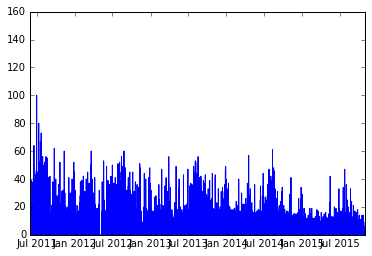

In [20]:
df = select_mungedata(2, 20, '2011-6-1')
plt.plot(df.set_index('date').waittime);

In [19]:
df.head()

,date,waittime,year,month,week,dayofweek,minofday,temp_max,temp_mean,temp_min,...,sea_lead2,sea_lag3,sea_lead3,van,van_lag1,van_lead1,van_lag2,van_lead2,van_lag3,van_lead3
0,2011-05-17 15:30:00,0,2011,5,20,1,930,60,51,42,...,1,1,1,1,1,1,1,1,1,1
1,2011-05-17 16:00:00,0,2011,5,20,1,960,60,51,42,...,1,1,1,1,1,1,1,1,1,1
2,2011-05-17 16:30:00,1,2011,5,20,1,990,60,51,42,...,1,1,1,1,1,1,1,1,1,1
3,2011-05-17 17:00:00,0,2011,5,20,1,1020,60,51,42,...,1,1,1,1,1,1,1,1,1,1
4,2011-05-17 17:30:00,1,2011,5,20,1,1050,60,51,42,...,1,1,1,1,1,1,1,1,1,1


In [21]:
# df = select_mungedata(2, 5, '2008-1-1')
data = BorderData(df, categoricals=['event'])

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)

data.predict(grid)
data.predict_ensemble()
data.print_metrics(grid)

OOB:  0.814080474056
Best score:  0.324985707084
** MSE for last cv fold **
Baseline :  13.8691851929
Model    :  18.6121581903
Ensemble :  13.2689409122
Weights  :  (0.6269348867101171, 1.5230801701703609)
** R^2 for last cv fold **
Baseline :  -0.292288336205
Model    :  -0.734224080686
Ensemble :  -0.236359406566
** Explained variance for last cv fold **
Baseline :  -0.107379488939
Model    :  -0.455153436657
Ensemble :  -0.0723331407189


In [23]:
model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
models = model_years(df, model, 2014, 2015, categoricals=['event'])

Training...  2014
Baseline :  0.272231133656
Model    :  0.301498355592
Ensemble :  0.350941206413
Training...  2015
Baseline :  -0.292288336205
Model    :  -0.720446251659
Ensemble :  -0.23137022317


In [29]:
features = select_features('2015-12-1', '2018-1-1')
fmatrix = handle_categoricals(features, ['event'])
yhat = grid.best_estimator_.predict(fmatrix)
insert_predictions('v1.0', 2, 20, fmatrix.index, yhat)

# Lynden

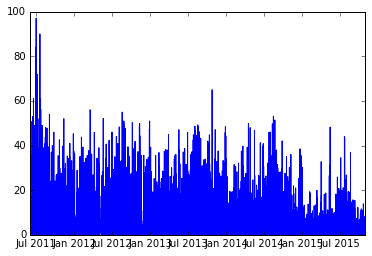

In [37]:
df = select_mungedata(2, 16, '2011-6-1')
plt.plot(df.set_index('date').waittime);

In [38]:
data = BorderData(df, categoricals=['event'])

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)

data.predict(grid)
data.predict_ensemble()
data.print_metrics(grid)

OOB:  0.897740440561
Best score:  0.465582265353
** MSE for last cv fold **
Baseline :  20.4808303991
Model    :  26.310955863
Ensemble :  19.79287517
Weights  :  (0.59559957426808596, 1.3087664733024578)
** R^2 for last cv fold **
Baseline :  -0.368242022343
Model    :  -0.757729289207
Ensemble :  -0.322282496505
** Explained variance for last cv fold **
Baseline :  -0.0530959232418
Model    :  -0.217873687237
Ensemble :  0.00633829974827


In [39]:
models = model_years(df, model, 2014, 2015, categoricals=['event'])

Training...  2014
minimize unexplained ValueError.  Returning default weights
Baseline : 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').